In [1]:

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git


Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089 (from 1)
Receiving objects: 100% (2095/2095), 15.07 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set path
data_dir = "/content/Sign-Language-Digits-Dataset/Dataset"

# Prepare empty lists
images = []
labels = []

# Load images and labels
for label in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, label)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(int(label))

# Convert to NumPy arrays
X = np.array(images).reshape(-1, 64, 64, 1).astype("float32") / 255.0
y = to_categorical(np.array(labels))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output size = number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.1840 - loss: 2.2598 - val_accuracy: 0.5879 - val_loss: 1.3895
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.6133 - loss: 1.1621 - val_accuracy: 0.7333 - val_loss: 0.7912
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.7658 - loss: 0.7078 - val_accuracy: 0.7576 - val_loss: 0.6981
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.7923 - loss: 0.6249 - val_accuracy: 0.8061 - val_loss: 0.6250
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.8485 - loss: 0.4837 - val_accuracy: 0.8303 - val_loss: 0.4976
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.8645 - loss: 0.4057 - val_accuracy: 0.8545 - val_loss: 0.5394
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.8890 - loss: 0.3359 - val_accuracy: 0.8000 - val_loss: 0.6111
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.8972 - loss: 0.3125 - val_accura

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8873 - loss: 0.4275
Test Accuracy: 89.83%


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


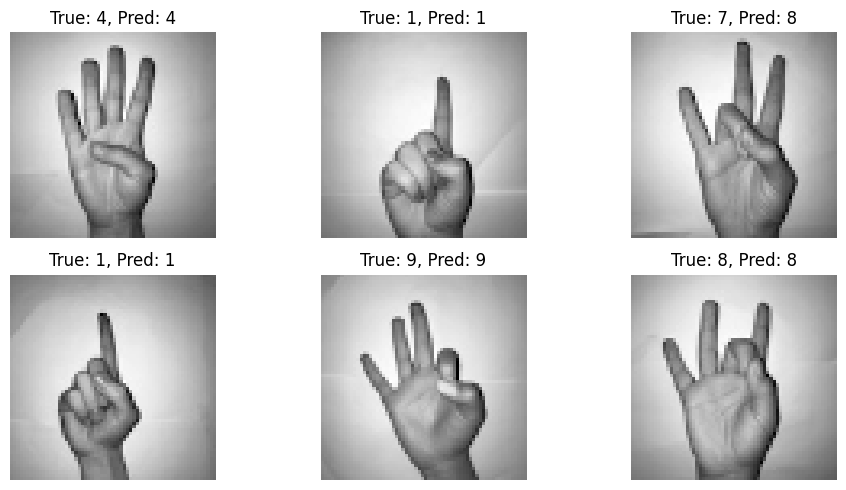

In [6]:
import matplotlib.pyplot as plt

preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)


plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
model.save("hand_gesture_easy_model.h5")


In [8]:
!pip install -q gradio


In [9]:
import gradio as gr


class_names = sorted(os.listdir(data_dir))


def predict_gesture(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (64, 64))
    img = img.reshape(1, 64, 64, 1) / 255.0
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    return f"Predicted Gesture: {class_names[class_idx]}"


In [10]:
interface = gr.Interface(
    fn=predict_gesture,
    inputs=gr.Image(type="numpy", label="Upload Hand Gesture Image"),
    outputs="text",
    title="Hand Gesture Recognition",
    description="Upload a hand gesture image to predict its class.",
    theme="default"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aeddb5456afdaa9e0b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
